#### import libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [164]:
df=pd.read_csv("/content/Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Analysis of dataset

In [165]:
# understand basic details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [166]:
# Check for null values in dataset
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [167]:
#list the columns name
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [168]:
#check whether duplicated values are there?
print("duplicated values: ",df.duplicated().sum())

duplicated values:  0


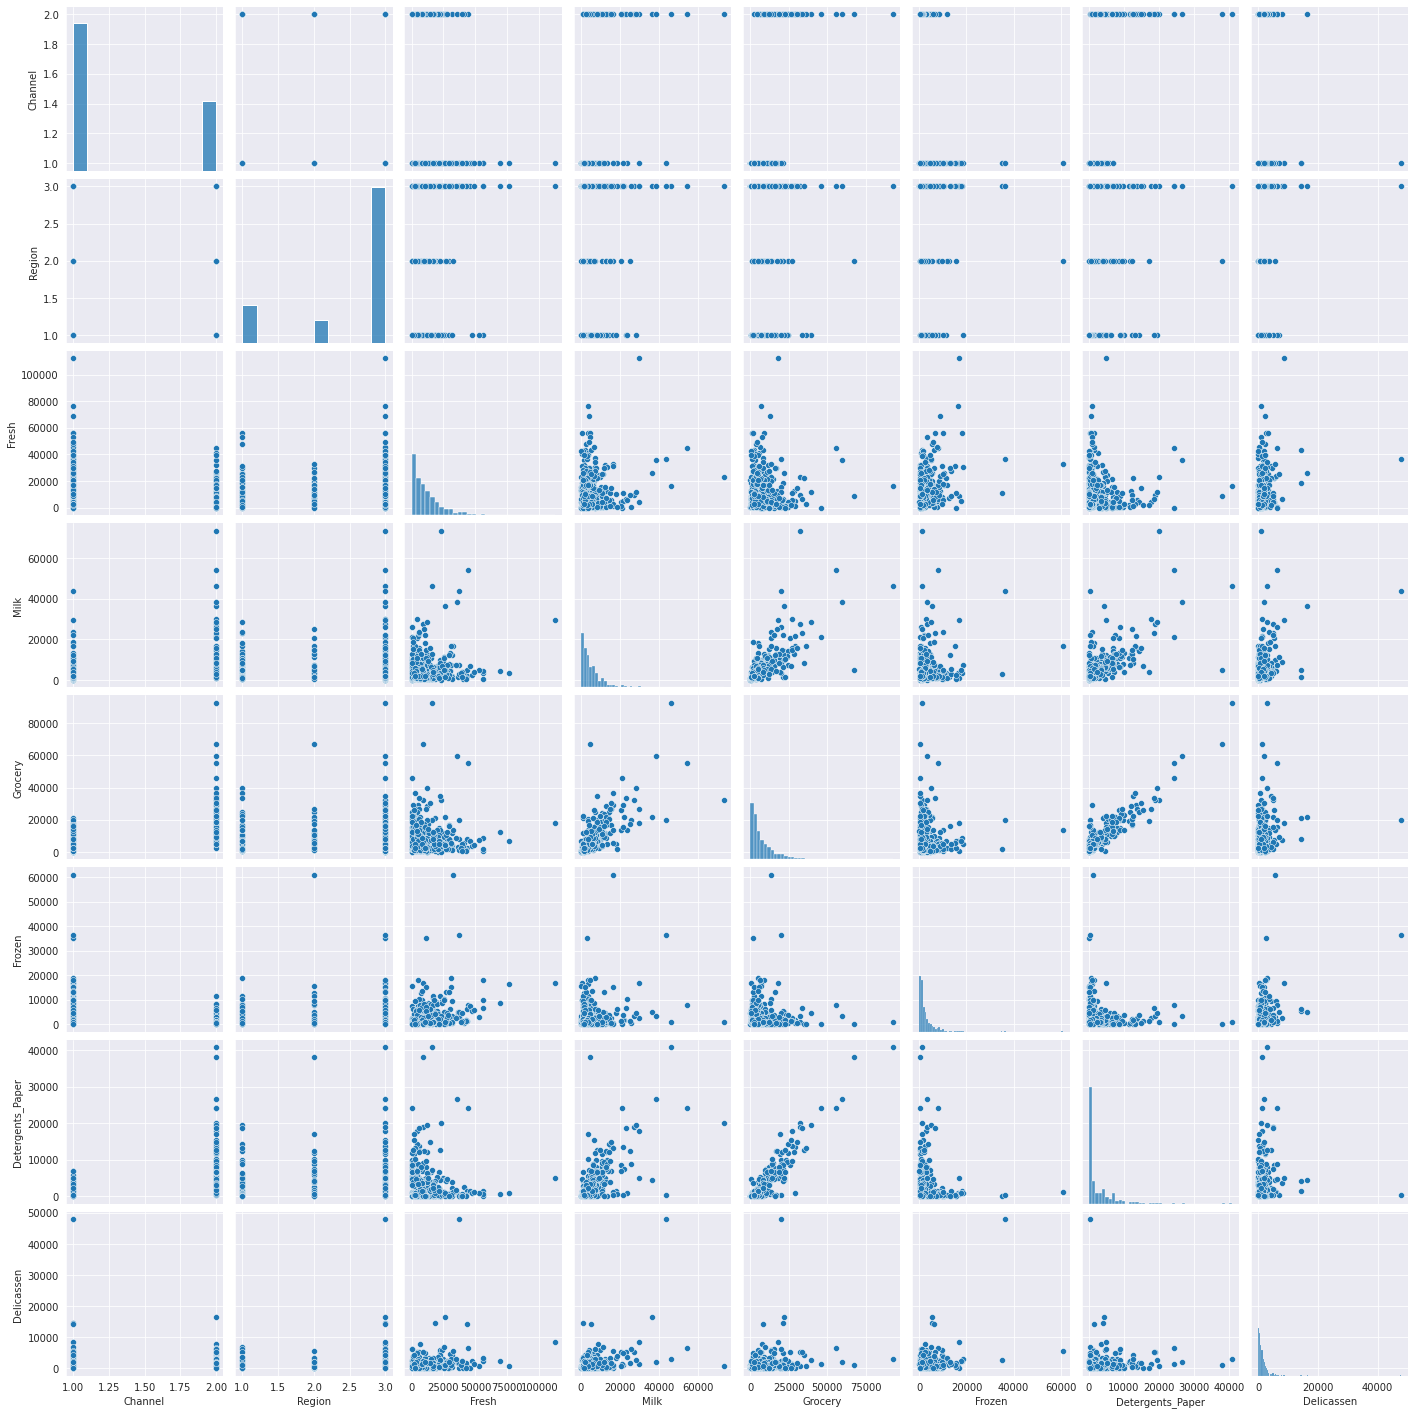

In [169]:
#Data Visualization
sns.pairplot(df)
plt.show()

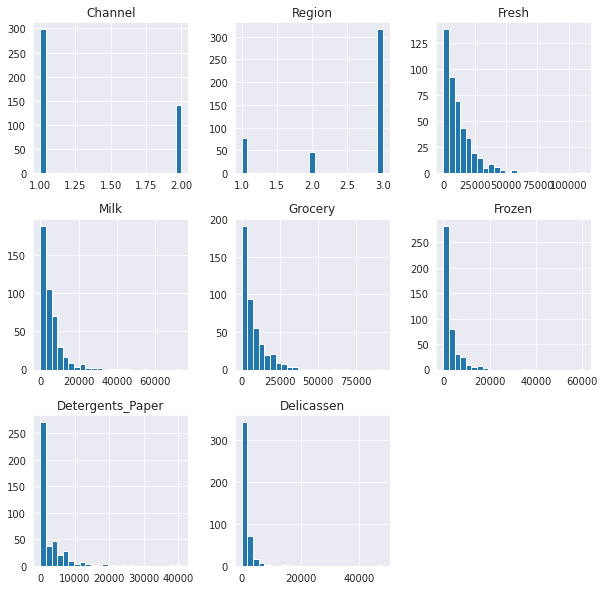

In [170]:
#Histogram
df.hist(bins=25,figsize=(10,10))
plt.show()

In [171]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [172]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


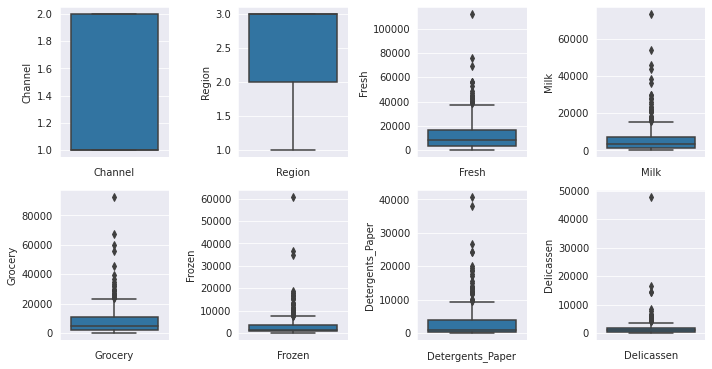

In [173]:
#plotting the columns for checking there any outliers in it
fig = plt.figure(figsize=(10,10))
for i in range(len(df.columns)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(y=df.iloc[:,i])
    plt.xlabel(df.columns[i])
plt.tight_layout()
plt.show()

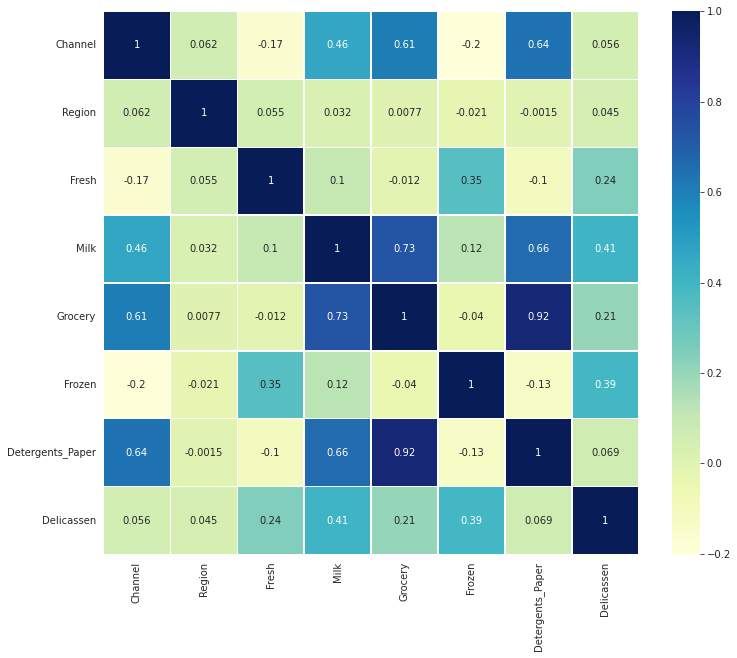

In [174]:
# Making a Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.2, cmap='YlGnBu');

In [175]:
df=df.drop(['Channel','Region'],axis=1)

#### Scaling of dataset

In [176]:
# Standard scaling our dataset.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = sc.fit_transform(df)

#### K-Means

In [177]:
from sklearn.cluster import KMeans

# Using Scaled data

inertia = []
for k in range(1,20):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertia.append(model.inertia_)
    
print(inertia)

[2640.000000000001, 1954.6477611552878, 1614.5183504384177, 1333.4860566624245, 1058.7712532570085, 916.8915059232645, 828.2009380707025, 744.3591264590846, 660.6184933200335, 625.0200689295206, 572.1501567205249, 534.0582720472269, 498.2037268717324, 461.29828976522185, 437.5916437126666, 401.03736776937495, 378.85866445481804, 365.90973011194865, 342.24874895022526]


Text(0, 0.5, 'Inertia')

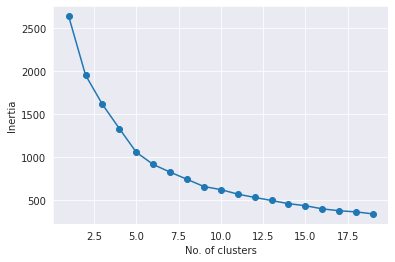

In [178]:
plt.plot(range(1,20),inertia,'-o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")

In [179]:
# Creating a model with 5 optimum clusters on scaled data

kmeans_s = KMeans(n_clusters=5)
kmeans_s.fit(scaled_df)
label_s = kmeans_s.predict(scaled_df)
print(label_s)

[0 1 1 0 4 0 0 0 0 1 1 0 4 1 1 0 1 0 0 0 0 0 4 1 1 0 0 0 1 4 0 0 0 4 0 1 4
 1 1 4 4 0 1 1 1 1 1 2 1 1 0 0 4 1 0 0 2 1 0 0 0 2 0 1 0 2 0 1 0 0 4 4 0 4
 0 0 0 1 0 0 0 1 1 0 0 2 2 4 0 4 0 0 2 4 1 0 0 0 0 0 1 1 0 4 0 0 1 1 0 1 0
 1 4 0 0 0 0 0 0 0 0 0 0 0 4 4 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 1 0 0
 0 4 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 4 0 0 0 0 4 1 3 0
 0 0 0 1 1 0 0 0 1 0 4 4 1 0 0 1 1 4 0 0 1 0 0 0 1 0 2 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 1 1 0 0 0 0 0 2 0 4 1 4 0 0 4
 4 0 0 0 0 1 1 1 0 1 0 0 0 0 4 0 0 4 4 0 0 0 0 4 4 4 4 0 0 0 4 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 4 1 0 0 1 0 0 0 1 0 0 0 0 0 4 0 0 0 0 0 1 0
 2 4 4 0 0 0 0 1 1 0 1 0 0 1 4 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 4 4 0 0 0 0 1 4 0 0 4 4 4 0 1 0 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 4 0 0 0 0 4
 1 0 0 0 0 0 4 0 0 1 0 1 0 1 0 0 0 0 4 1 4 0 0 0 4 0 0 0 4 4 1 0 0]


In [180]:
# Creating a model with 4 optimum cluster on scaled data.

kmeans_s1 = KMeans(n_clusters=4)
kmeans_s1.fit(scaled_df)
label_s1 = kmeans_s1.predict(scaled_df)
print(label_s1)

[0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 2 1 1 0 0 0 1 0 0 2 1 0 0 0 2 0 1 0 2 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 2 2 0 0 0 0 0 2 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 3 1 3 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 2 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 1 0
 2 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0]


In [181]:
# Creating a model with 6 optimum cluster on scaled data.

kmeans_s2 = KMeans(n_clusters=6)
kmeans_s2.fit(scaled_df)
label_s2 = kmeans_s2.predict(scaled_df)
print(label_s2)

[0 4 4 0 1 0 0 0 0 4 4 0 1 4 4 0 4 0 0 0 0 0 1 1 1 0 0 0 4 1 0 0 0 1 0 4 1
 4 4 1 1 0 4 4 4 4 4 2 4 4 0 0 1 4 0 0 2 4 0 0 0 2 0 4 0 2 0 4 0 0 0 1 0 0
 0 0 0 4 0 0 0 4 4 0 0 2 2 1 0 1 0 0 2 5 4 0 0 0 0 0 4 4 0 1 0 0 4 4 0 4 0
 4 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 4 0 0
 0 1 0 0 0 0 0 4 4 0 4 4 4 0 0 4 0 4 4 0 0 0 4 4 0 4 0 4 1 0 0 0 0 1 4 3 0
 0 0 0 4 4 0 0 0 4 0 0 1 4 0 0 4 4 1 0 0 4 0 0 0 4 0 2 0 0 4 4 4 0 4 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 4 4 0 0 0 0 0 2 0 1 4 1 0 0 1
 1 0 0 0 0 4 4 4 0 4 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 4 0 0
 0 0 0 0 0 4 4 4 4 4 4 0 0 4 0 1 4 0 0 4 0 0 0 4 0 0 0 0 0 5 0 0 0 0 0 4 0
 2 0 1 0 0 0 0 4 4 0 4 0 0 4 1 0 4 0 4 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 4 1 0 0 1 0 1 0 4 0 0 0 0 0 0 0 0 1 0 0 4 0 0 0 0 1 0 0 0 0 1
 4 0 0 0 0 0 0 0 0 4 0 4 0 4 0 0 0 0 0 4 1 0 0 0 0 0 0 0 1 1 4 0 0]


In [182]:
# Creating a model with 7 optimum cluster on scaled data.

kmeans_s3 = KMeans(n_clusters=7)
kmeans_s3.fit(scaled_df)
label_s3 = kmeans_s2.predict(scaled_df)
print(label_s3)

[0 4 4 0 1 0 0 0 0 4 4 0 1 4 4 0 4 0 0 0 0 0 1 1 1 0 0 0 4 1 0 0 0 1 0 4 1
 4 4 1 1 0 4 4 4 4 4 2 4 4 0 0 1 4 0 0 2 4 0 0 0 2 0 4 0 2 0 4 0 0 0 1 0 0
 0 0 0 4 0 0 0 4 4 0 0 2 2 1 0 1 0 0 2 5 4 0 0 0 0 0 4 4 0 1 0 0 4 4 0 4 0
 4 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 4 0 0
 0 1 0 0 0 0 0 4 4 0 4 4 4 0 0 4 0 4 4 0 0 0 4 4 0 4 0 4 1 0 0 0 0 1 4 3 0
 0 0 0 4 4 0 0 0 4 0 0 1 4 0 0 4 4 1 0 0 4 0 0 0 4 0 2 0 0 4 4 4 0 4 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 4 4 0 0 0 0 0 2 0 1 4 1 0 0 1
 1 0 0 0 0 4 4 4 0 4 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 4 0 0
 0 0 0 0 0 4 4 4 4 4 4 0 0 4 0 1 4 0 0 4 0 0 0 4 0 0 0 0 0 5 0 0 0 0 0 4 0
 2 0 1 0 0 0 0 4 4 0 4 0 0 4 1 0 4 0 4 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 4 1 0 0 1 0 1 0 4 0 0 0 0 0 0 0 0 1 0 0 4 0 0 0 0 1 0 0 0 0 1
 4 0 0 0 0 0 0 0 0 4 0 4 0 4 0 0 0 0 0 4 1 0 0 0 0 0 0 0 1 1 4 0 0]


In [183]:
from sklearn.metrics import silhouette_score
# Checking the silhouette_score of both models

print(f'Silhouette Score(n=5): {silhouette_score(scaled_df, label_s)}')

print(f'\nSilhouette Score(n=4): {silhouette_score(scaled_df, label_s1)}')

print(f'\nSilhouette Score(n=6): {silhouette_score(scaled_df, label_s2)}')

print(f'\nSilhouette Score(n=7): {silhouette_score(scaled_df, label_s3)}')

Silhouette Score(n=5): 0.36807191214496154

Silhouette Score(n=4): 0.3546109298192704

Silhouette Score(n=6): 0.378071628252701

Silhouette Score(n=7): 0.378071628252701


##### n=6 has nighest score, optimum number of cluster is 6 or 7 


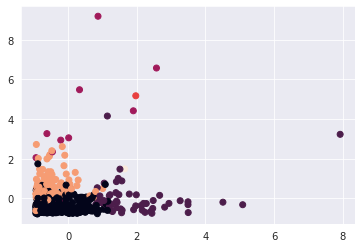

In [184]:
y_kmeans=pd.DataFrame(label_s2)
plt.scatter(scaled_df[:,0],scaled_df[:,1],c=y_kmeans)

In [185]:
#

### Using Silhoutte Score 

In [186]:
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.40028869875789824
For n_clusters = 3 The average silhouette_score is : 0.48825746052364977
For n_clusters = 4 The average silhouette_score is : 0.5196833924138705
For n_clusters = 5 The average silhouette_score is : 0.5953486775015351
For n_clusters = 6 The average silhouette_score is : 0.705694905749099
For n_clusters = 7 The average silhouette_score is : 0.7855435151423282


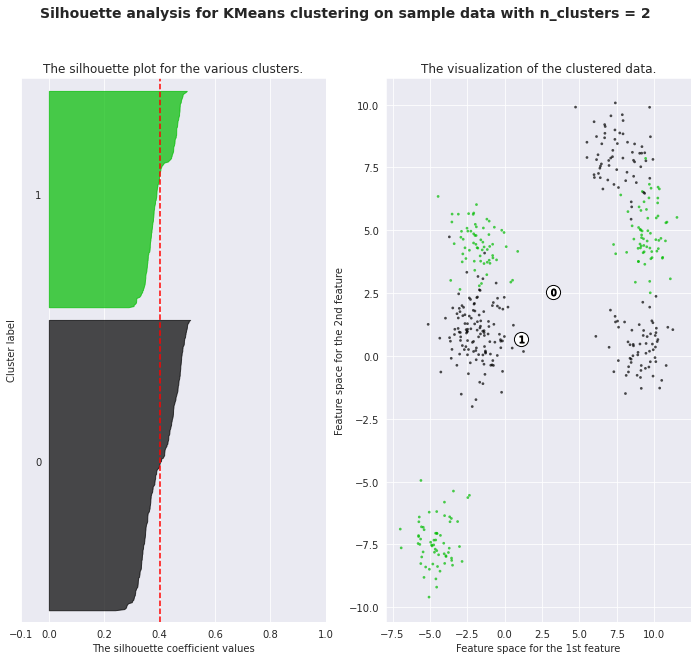

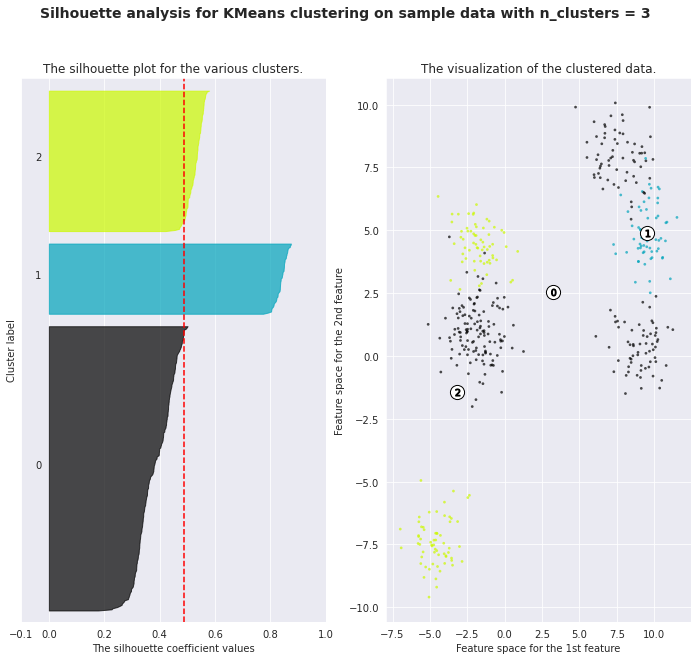

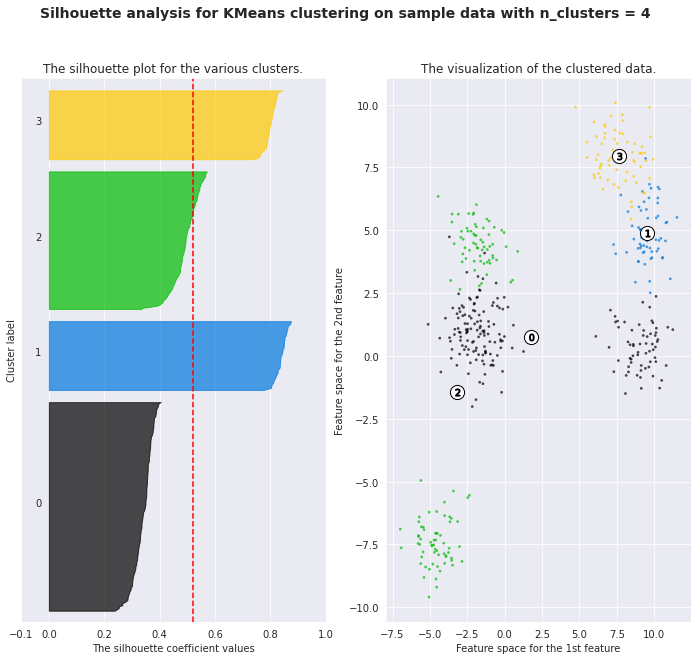

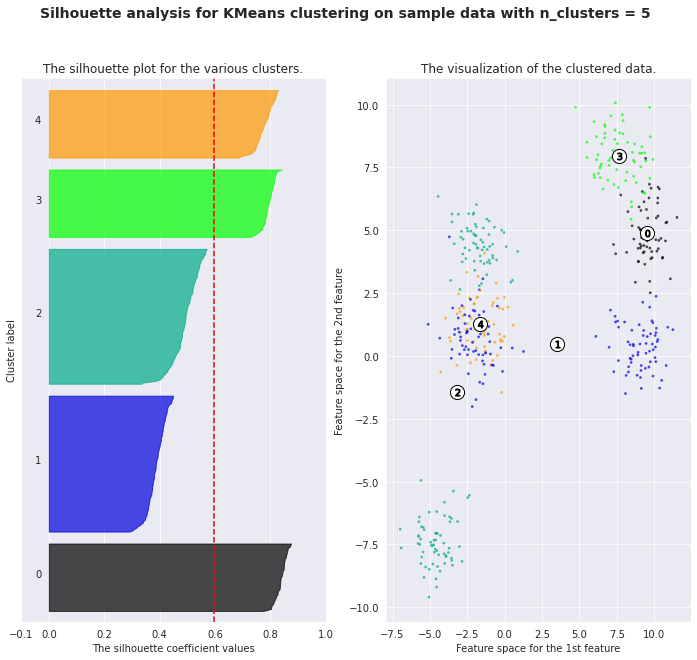

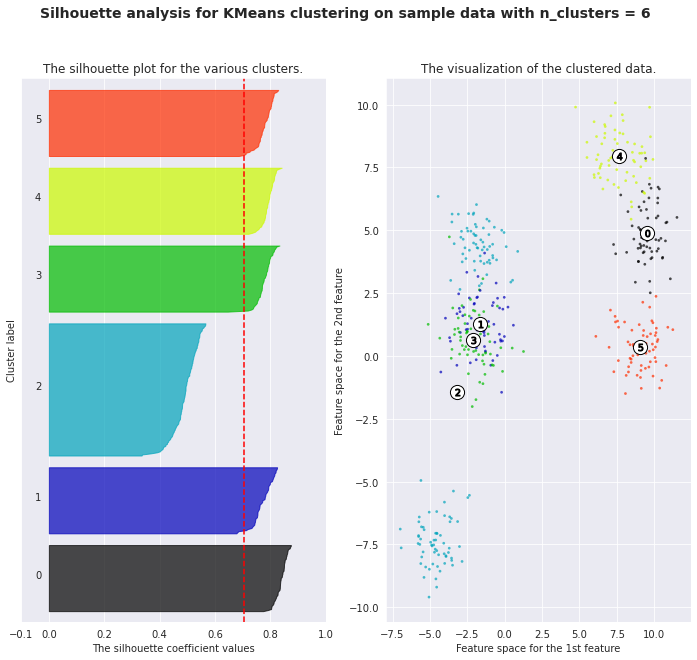

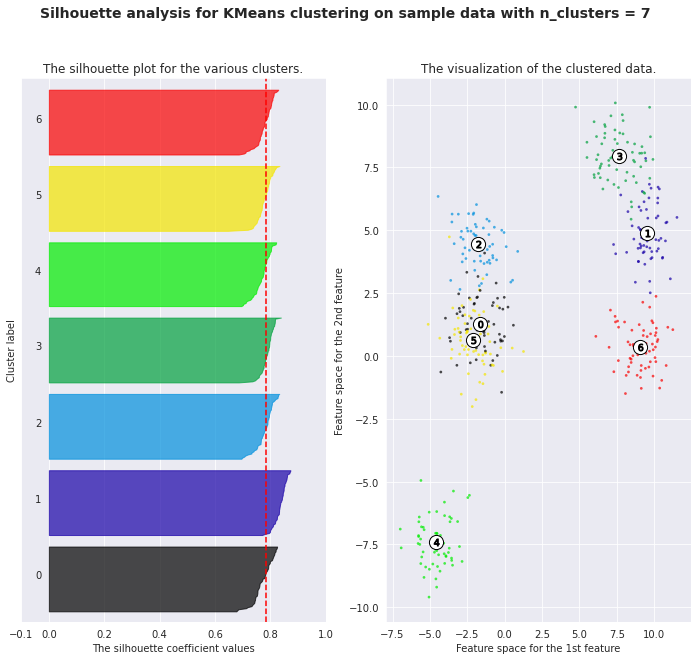

In [187]:

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=440,
    n_features=8,
    centers=7,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12,10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

By this silhoeutte samples method optimal number of cluster is 7.
 
 Implement KMeans modelling using n =7

In [188]:
df_kmeans = KMeans(n_clusters =7, init ='k-means++', random_state = 0)
df_pred = df_kmeans.fit_predict(X)
df_pred

array([1, 6, 4, 0, 5, 1, 4, 5, 6, 4, 0, 4, 2, 6, 3, 3, 4, 0, 4, 5, 3, 3,
       5, 5, 5, 6, 6, 6, 0, 6, 4, 6, 2, 2, 1, 0, 1, 6, 0, 2, 2, 3, 4, 2,
       3, 0, 3, 6, 6, 6, 0, 1, 1, 3, 0, 5, 6, 2, 5, 1, 6, 3, 3, 2, 4, 1,
       4, 5, 6, 0, 0, 1, 2, 5, 0, 6, 3, 5, 1, 4, 5, 1, 1, 0, 1, 4, 5, 5,
       4, 3, 0, 5, 3, 0, 2, 3, 0, 2, 2, 3, 3, 3, 1, 5, 1, 5, 3, 0, 6, 6,
       1, 1, 2, 1, 4, 6, 4, 4, 3, 1, 2, 6, 6, 3, 5, 4, 4, 6, 5, 4, 6, 5,
       4, 2, 3, 5, 6, 3, 5, 1, 6, 3, 2, 5, 2, 4, 6, 1, 1, 2, 1, 4, 3, 3,
       6, 1, 1, 0, 4, 4, 4, 5, 3, 1, 1, 6, 3, 0, 5, 1, 1, 3, 0, 6, 0, 5,
       1, 2, 2, 5, 1, 3, 6, 5, 5, 6, 1, 2, 3, 0, 2, 2, 3, 5, 3, 0, 0, 3,
       2, 6, 6, 2, 3, 0, 5, 5, 4, 1, 6, 0, 4, 2, 6, 1, 2, 6, 1, 1, 0, 4,
       1, 3, 1, 2, 2, 6, 3, 4, 6, 0, 3, 6, 2, 1, 2, 3, 3, 0, 6, 4, 4, 6,
       0, 4, 5, 2, 0, 0, 3, 4, 6, 3, 1, 4, 0, 6, 4, 1, 2, 4, 4, 5, 3, 4,
       2, 5, 5, 5, 2, 0, 0, 4, 4, 2, 1, 5, 3, 5, 4, 0, 4, 1, 6, 6, 6, 6,
       1, 4, 5, 2, 5, 0, 2, 0, 5, 5, 1, 2, 2, 4, 4,

In [189]:
# reiterating the values of highest silhouette score
print(f'\nSilhouette Score(n=7): {silhouette_score(X,df_pred)}')


Silhouette Score(n=7): 0.7855435151423282


##  PCA Reduction

In [190]:
pca = PCA(n_components=2)
pca.fit(scaled_df)
X_pca = pca.transform(scaled_df)

In [191]:
X_pca.shape

(440, 2)

In [192]:
pca.explained_variance_ratio_*100

array([44.08289288, 28.37639953])

### K-Means Clustering after applying PCA

In [193]:
wcss_pca = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss_pca.append(kmeans.inertia_)

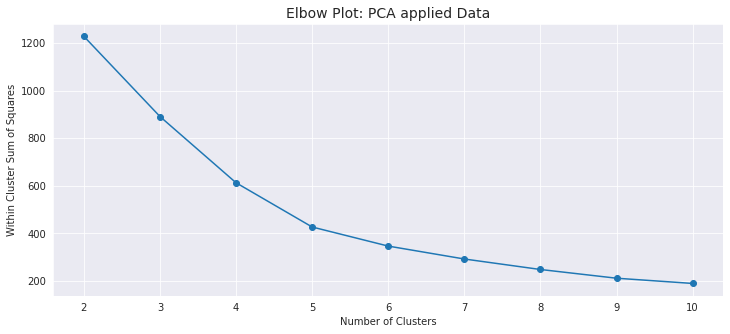

In [194]:
plt.figure(figsize=(12, 5))
plt.title('Elbow Plot: PCA applied Data', fontsize=14)
plt.plot(range(2, 11), wcss_pca, marker='o')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.show()

n=6

In [195]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_pca = kmeans.fit_predict(X_pca)

In [196]:
pca_df = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])

In [197]:
pca_df['kmeans'] = kmeans_pca

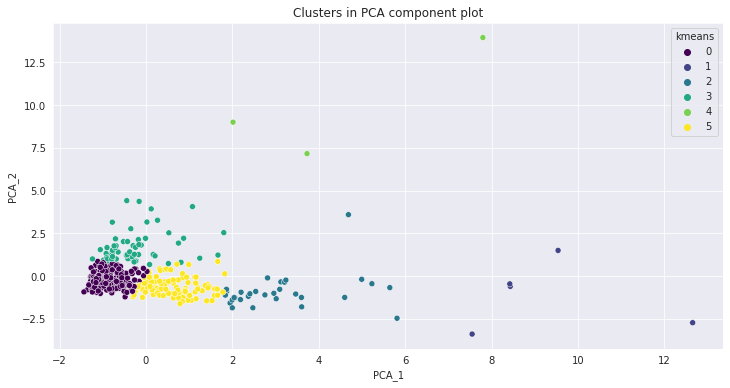

In [198]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.title('Clusters in PCA component plot')
sns.scatterplot(x='PCA_1', y='PCA_2', data=pca_df, hue='kmeans', palette='viridis')
plt.show()